In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Importing all the necessary libraries.

In [2]:
bank_df=pd.read_csv(r'C:\Users\Akshay Deshmukh\Desktop\Great Learning\Decision Tree and Randoom forest\Project 4 dataset.csv')

Reading the data and storing it as a dataframe.

In [3]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank_df.shape

(45211, 17)

Analysing the number of rows and coloumns in the data.

In [5]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Cheaking the data types of each attribute.

Here we observe that many of the variables are of object type which are needed to be treated as none of the algorithms
work on object data type variables.

In [6]:
print((bank_df[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration',\
                'campaign','pdays','previous','poutcome']]
       == 0).sum())

age              0
job              0
marital          0
education        0
default          0
balance       3514
housing          0
loan             0
contact          0
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome         0
dtype: int64


Cheacking for any unrequired null values in the attributes.

In [7]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Analysing the atrributes in the data.

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

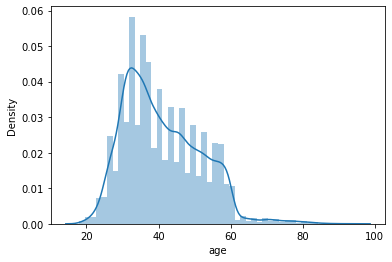

In [8]:
sns.distplot(bank_df['age'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

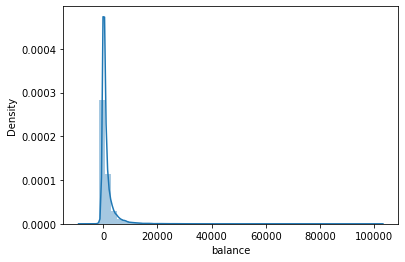

In [9]:
sns.distplot(bank_df['balance'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

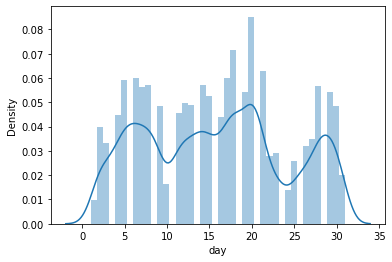

In [10]:
sns.distplot(bank_df['day'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

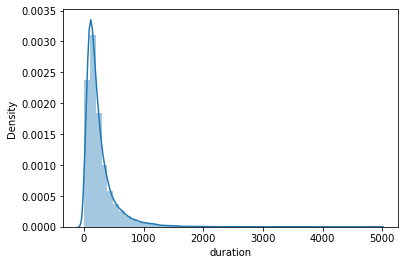

In [11]:
sns.distplot(bank_df['duration'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

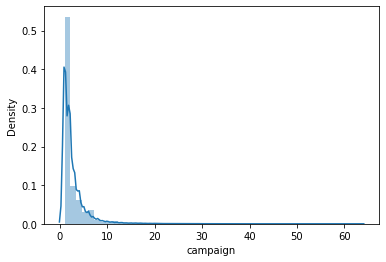

In [12]:
sns.distplot(bank_df['campaign'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

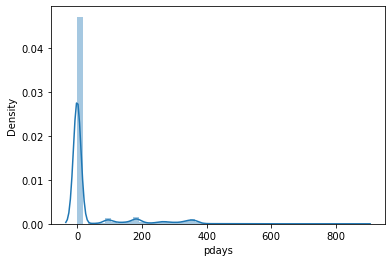

In [13]:
sns.distplot(bank_df['pdays'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

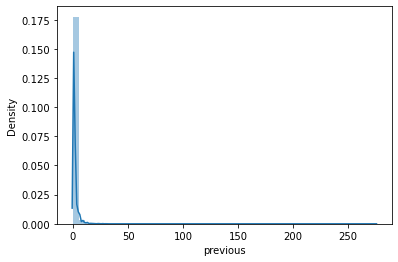

In [14]:
sns.distplot(bank_df['previous'])

Plotting all the continous varialbes to check for the skewness in the variables.

Here we observe that most of the attributes except for "days" and "age" are right skewed.

The attributes "days" and "age" have multiple peak values in it.

There are also some outlaiers present in the attributes.

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

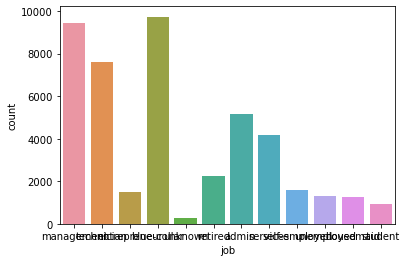

In [15]:
sns.countplot(bank_df['job'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

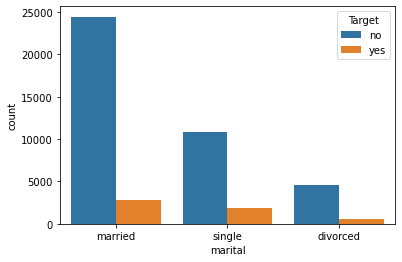

In [16]:
sns.countplot(bank_df['marital'], hue=bank_df['Target'])

By observing the marital status variable we found out that more number of married people have subscribed for term deposite.

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

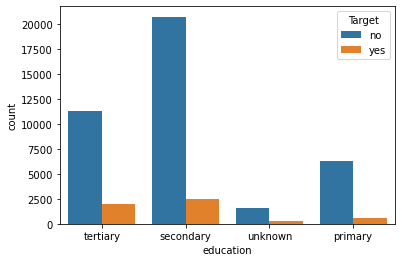

In [17]:
sns.countplot(bank_df['education'], hue=bank_df['Target'])

In the "education" variable more people with secondary education have subscribed for term deposite.

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

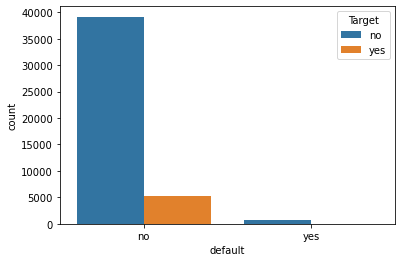

In [18]:
sns.countplot(bank_df['default'], hue=bank_df['Target'])

In the "default" variable only people with no credit in default have subscribed for term deposite. 

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

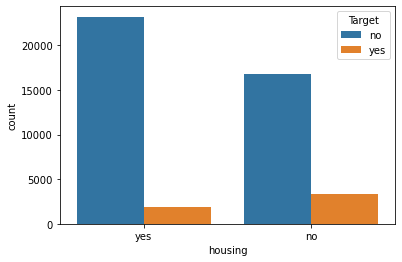

In [19]:
sns.countplot(bank_df['housing'], hue=bank_df['Target'])

For the "housing" coloum, majority of people who do not have any housing loan have subscribed for term deposite. 

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

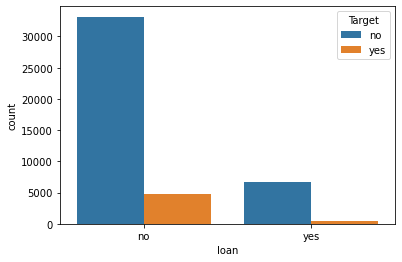

In [20]:
sns.countplot(bank_df['loan'], hue=bank_df['Target'])

People who do not have any personal loans are more in number for subscribing the term deposite.

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

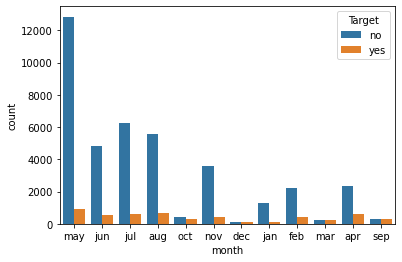

In [21]:
sns.countplot(bank_df['month'], hue=bank_df['Target'])

By observing the "month" variable we can see that people who were last contacted in the months from February to August have more number people who subscribed for term deposite. 

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

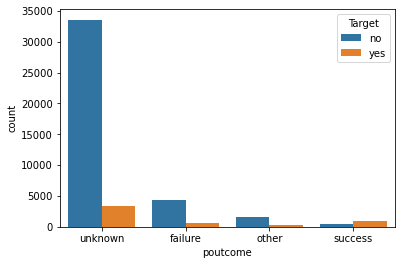

In [22]:
sns.countplot(bank_df['poutcome'], hue=bank_df['Target'])

D:\Anaconda\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

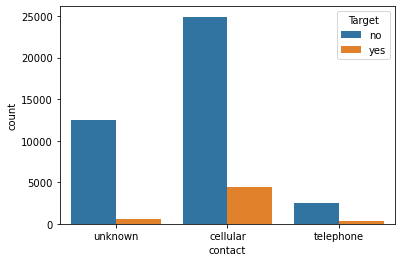

In [23]:
sns.countplot(bank_df['contact'], hue=bank_df['Target'])

People who were contacted on their cellular phones have responded more by subscribing the term deposite.

In [24]:
bank_df['job'].unique()
bank_df['marital'].unique()
bank_df['education'].unique()
bank_df['contact'].unique()
bank_df['poutcome'].unique()
bank_df['month'].unique()
bank_df['housing'].unique()
bank_df['Target'].unique()
bank_df['loan'].unique()
bank_df['default'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
label_encoder = preprocessing.LabelEncoder() 
 
bank_df['job']= label_encoder.fit_transform(bank_df['job']) 
bank_df['marital']= label_encoder.fit_transform(bank_df['marital'])
bank_df['education']= label_encoder.fit_transform(bank_df['education']) 
bank_df['contact']= label_encoder.fit_transform(bank_df['contact']) 
bank_df['poutcome']= label_encoder.fit_transform(bank_df['poutcome']) 
bank_df['month']= label_encoder.fit_transform(bank_df['month']) 
bank_df['housing']= label_encoder.fit_transform(bank_df['housing']) 
bank_df['Target']= label_encoder.fit_transform(bank_df['Target']) 
bank_df['loan']= label_encoder.fit_transform(bank_df['loan']) 
bank_df['default']= label_encoder.fit_transform(bank_df['default'])  

Lable encoding the catagorical variables in the data so as to make it fit for the model to process.

In [26]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Ensuring all the catagorical variables have been encoded properly.

In [27]:
X =  bank_df.drop("Target", axis=1)
y =  bank_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

Spliting the data into training set and test set in 30:70 ratio.

In [28]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(31647, 16) (13564, 16)
(31647,) (13564,)


In [29]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, random_state = 100)

Calling the decission tree model and setting the hyper parameters.

In [30]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=100)

Fitting the model on the training set.

In [31]:
y_pred = dt_model.predict(X_test)

In [32]:
print(dt_model.score(X_train , y_train)) # performance on train data
print(dt_model.score(X_test , y_test))  # performance on test data

1.0
0.8784281922736655


Here we observe the performance on the training set and the test set.

For the training set set the model has shown 100% accuracy in predicting the values.

For test set the model was only able to predict 87.84% of values correctly.

This is a clear state of over fitting.

In [34]:
rfcl = RandomForestClassifier(n_estimators = 101,max_features=4,min_samples_leaf=5, random_state=51,oob_score=True)
rfcl = rfcl.fit(X_train, y_train)

Employing the random forest classifier and setting the hyper parameters.

In [35]:
print(rfcl.score(X_train , y_train)) # performance on train data
print(rfcl.score(X_test , y_test))  # performance on test data

0.9493790880652194
0.9085815393689177


Here we observe the performance on the training set and the test set for random forest.

For the training set set the model has shown 94.93% accuracy in predicting the values.

For test set the model was only able to predict 90.85% of values correctly.

Here the over fitting scenario is reduced.

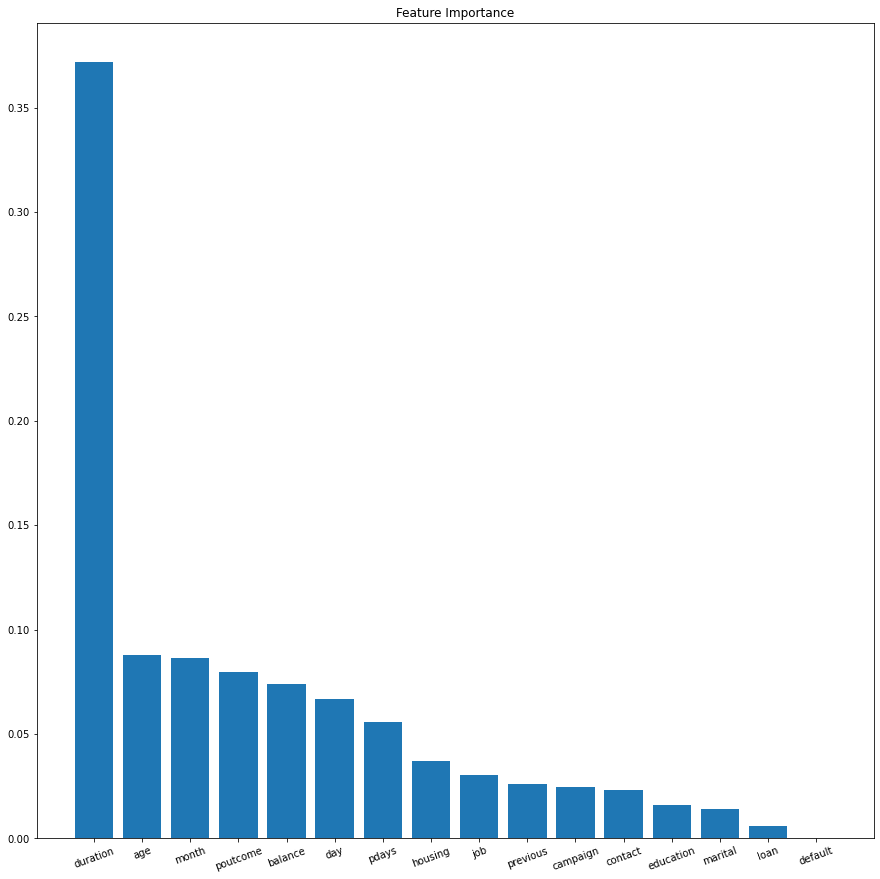

In [37]:
# Calculate feature importances
var_imp = rfcl.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(var_imp)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [bank_df.columns[i] for i in indices]

# Barplot: Add bars
plt.subplots(figsize=(15,15))
plt.bar(range(X_test.shape[1]), var_imp[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), names, rotation=20, fontsize = 10)
# Create plot title
plt.title("Feature Importance")
# Show plot

plt.show()

In [38]:
gbcl = GradientBoostingClassifier(n_estimators = 101, max_depth = 3)
gbcl = gbcl.fit(X_train, y_train)

Calling the Gradiant boosting technique.  

In [39]:
print(gbcl.score(X_train , y_train)) # performance on train data
print(gbcl.score(X_test , y_test))  # performance on test data

0.9083009447972952
0.9076968445886169


Conclusion:

1. In Decision tree classifier we observed an over fitting case where the model had a huge difference in percentages for predecting the values in training set and test set.

2. After Decision tree calssifier we applied the same data to Random forest classifier. The Random forest calssifier reduced the overfitting problem in the Decission tree classifier but still there was a difference in the percentage of values predected in training and test set in Random forest classifier.

3. Same data was given to the Gradiant boosting technique, where the model worked better than the previous two models. It eliminated the over fitting scenario.

Here we observe that Gradiant Boosting technique gives better performance than Decission tree and Random forest algorithms. It also overcomes the problem of over fitting which is observed in  Decission tree and Random forest classifier.